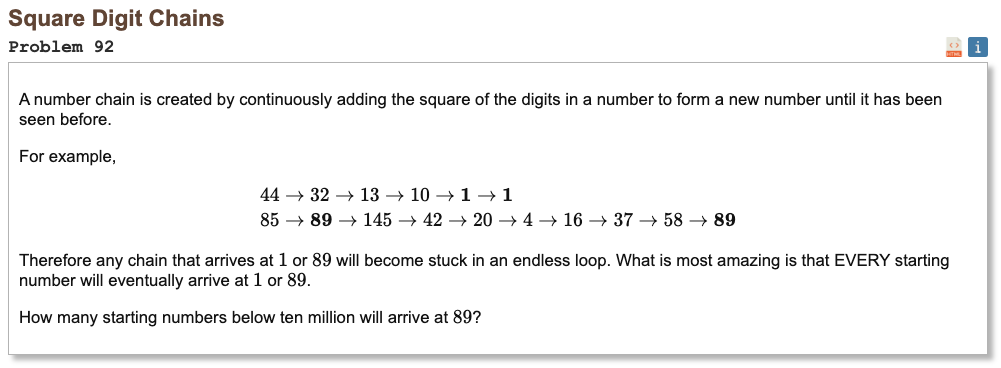

## Initial approach

* Understanding the example:
* starting with 44, lets write the chain

In [1]:
num = 44

def sequence(num):
    new_number = 0
    for i in str(num):
        new_number+=int(i)**2
    return new_number

sequence(44)

32

In [2]:
def sequence_chain(num):
    seen = []
    while num not in seen:
        seen.append(num)
        num = sequence(num)
    return seen

sequence_chain(44)

[44, 32, 13, 10, 1]

* start with any number below 10 million  
* make a chain: replace number with sum of squares of its digits  
* chain will always end with 1 or 89  
* count how many chains end with 89

In [3]:
%%time

def ends_with_89(num):
    while num != 1 and num != 89:
        num = sequence(num)
    return num == 89

count = 0

for i in range(1, 10_000_000):
    if ends_with_89(i):
        count += 1

print("Result:", count)

Result: 8581146
CPU times: user 20.5 s, sys: 90.6 ms, total: 20.6 s
Wall time: 20.7 s


* it takes more than 20 seconds because it builds a chain for every number  
* using memoization helps skip repeated chains and makes it much faster 

In [4]:
%%time

def ends_with_89(num, memo):
    original = num
    chain = []

    while num != 1 and num != 89:
        if num in memo:
            num = memo[num]
            break
        chain.append(num)
        num = sequence(num)

    for n in chain:
        memo[n] = num

    memo[original] = num
    return num == 89

count = 0
memo = {}

for i in range(1, 10_000_000):
    if ends_with_89(i, memo):
        count += 1

print("Result", count)

Result 8581146
CPU times: user 7.23 s, sys: 118 ms, total: 7.35 s
Wall time: 7.35 s
